# 1. Load Data

In [ ]:

import pandas as pd
bc = pd.read_csv('Breast_Cancer.csv')
bc.head()

y = bc['diagnosis']
X = bc.drop(columns=['diagnosis'])

# standardize X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 2.1 Scree Plot

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


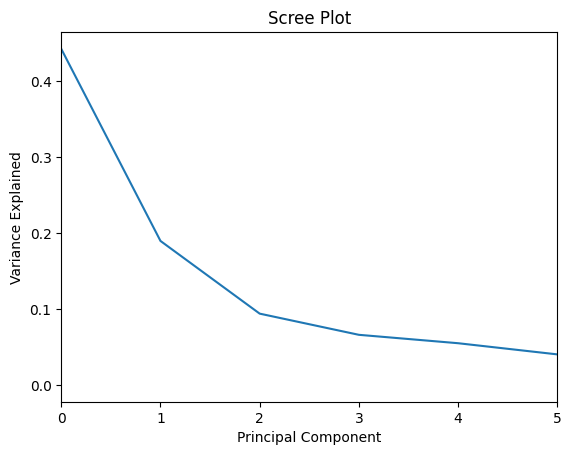

In [31]:
# create a PCA and plot scree plot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

print(pca.explained_variance_ratio_)

pca = PCA()
pca.fit(X_scaled)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xlim(0, 5)
plt.title('Scree Plot')
plt.show()

# 2.2 Biplot

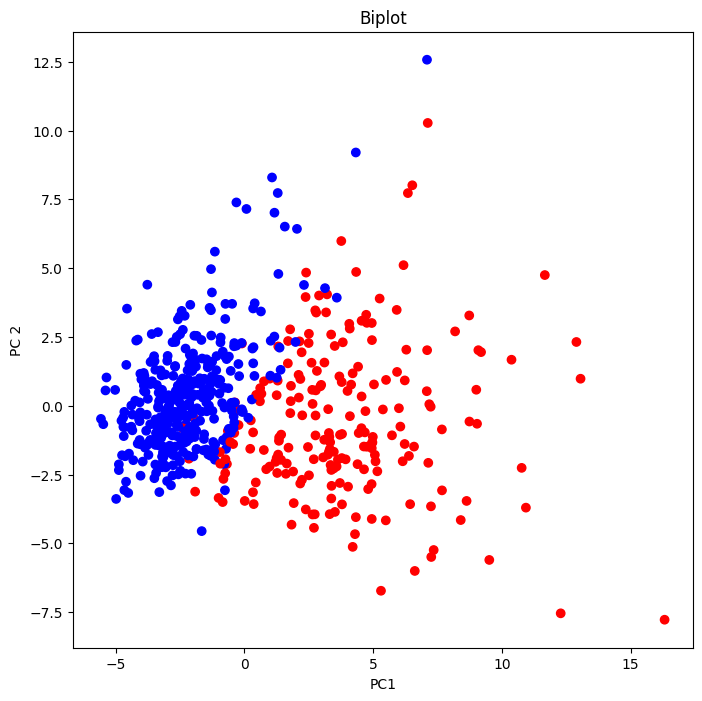

In [ ]:
# plot biplots

cmap = {'M': 'red', 'B': 'blue'}
status_colors = y.map(cmap)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=status_colors)

plt.xlabel('PC1')
plt.ylabel('PC 2')
plt.title('Biplot')
plt.show()

# 2.3 Loadings (Which variables contribute most to PC1/PC2?)

In [44]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns= X.columns,index=[f"PC{i}" for i in range(1, len(loadings) + 1)])

print("PC1")
print(loadings_df.loc["PC1"].sort_values(key=lambda x: abs(x), ascending=False)[:5])
print("PC2")
print(loadings_df.loc["PC2"].sort_values(key=lambda x: abs(x), ascending=False)[:5])

# i started this in python without looking at the questions initially, so apologies for not having the pretty plot with the arrows (as you do in R)





PC1
concave points_mean     0.260854
concavity_mean          0.258400
concave points_worst    0.250886
compactness_mean        0.239285
perimeter_worst         0.236640
Name: PC1, dtype: float64
PC2
fractal_dimension_mean     0.366575
fractal_dimension_se       0.280092
fractal_dimension_worst    0.275339
radius_mean               -0.233857
compactness_se             0.232716
Name: PC2, dtype: float64


## 
**Ans:** 
For PC1, the most important variables are concave points_mean, concavity mean, concave points worst, compactnes mean, and perimeter worst. 
For PC2, the most important are fractal_dimension_mean, fractal_dimension_se, fractal_dimension worst, radius mean, and compactness_se.


# 3.1 & 3.2 TSNE across different perplexities with true label coloring

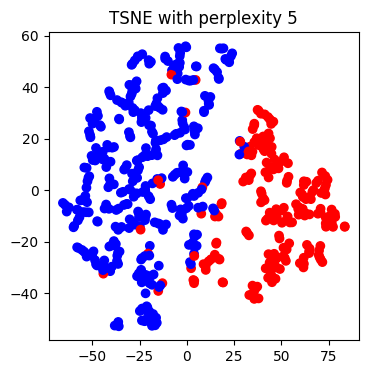

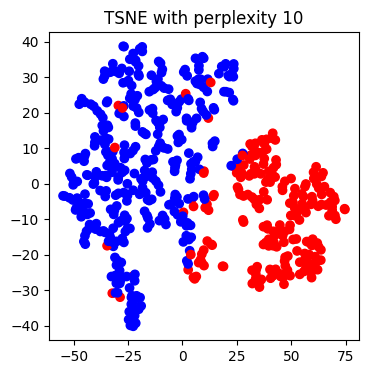

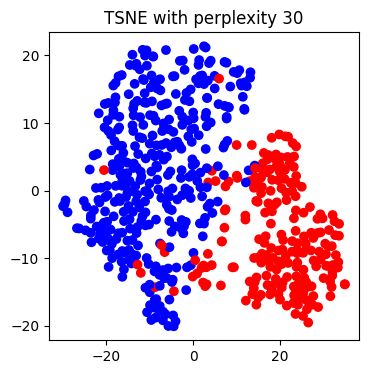

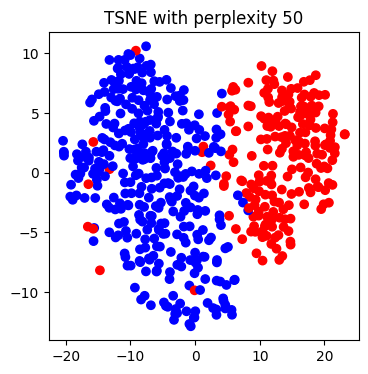

In [46]:
# generate TSNE plots across a few different perplexities
from sklearn.manifold import TSNE
perplexities = [5, 10, 30, 50]
for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.figure(figsize=(4, 4))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=status_colors)
    plt.title(f'TSNE with perplexity {perplexity}')
    plt.show()

# 4.1 Elbow Method

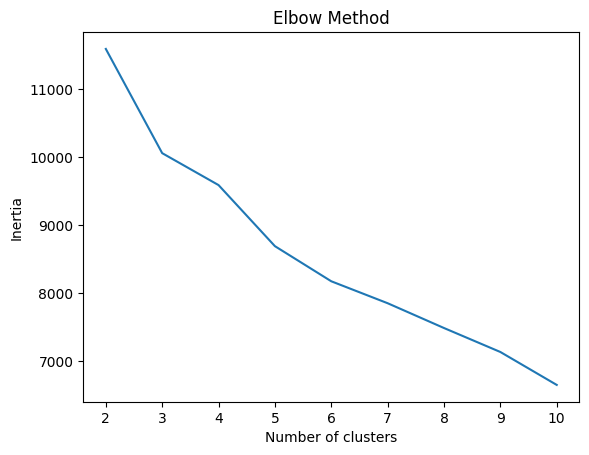

In [ ]:
# K means elbow method 

from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))
plt.plot(range(2, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Ans: there isn't a very clear elbow, but the most likely candidate is 3 clusters. 

# 4.2 Silhouette Score

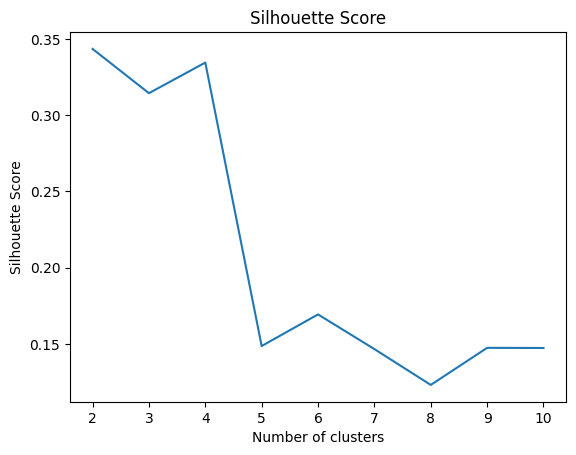

In [ ]:
plt.plot(range(2, 11), silhouette)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# Ans: the silhouette score is highest at 2 clusters

# 4.3 Confusion Matrix

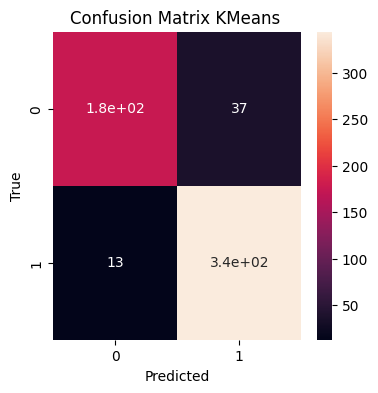

In [121]:
# compare the cluster assignment to the true labels
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
y_pred = kmeans.labels_
plt.figure(figsize=(4, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
plt.title('KMeans Clustering')


from sklearn.metrics import confusion_matrix

y_km = y.map({'M': 1, 'B': 0})
y_km2 = y.map({'M': 0, 'B': 1})

confusion = confusion_matrix(y_km2, y_pred)
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix KMeans ')
plt.show()



# 5.1/5.2  Hierarchical Clustering with Different Linkages and Dendrograms

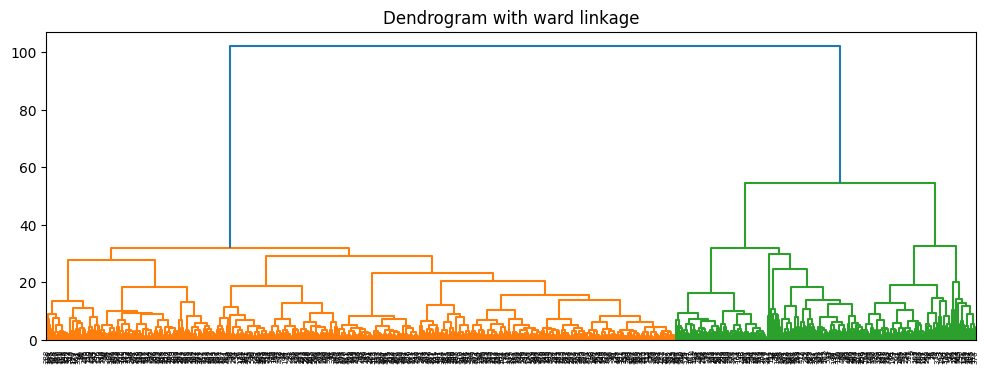

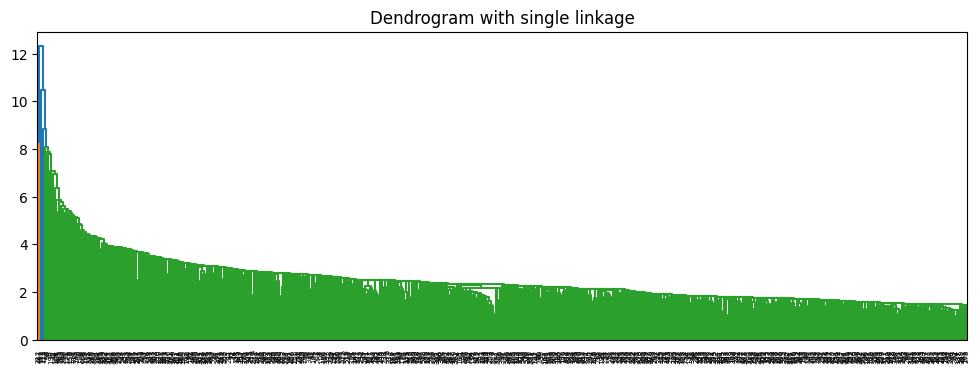

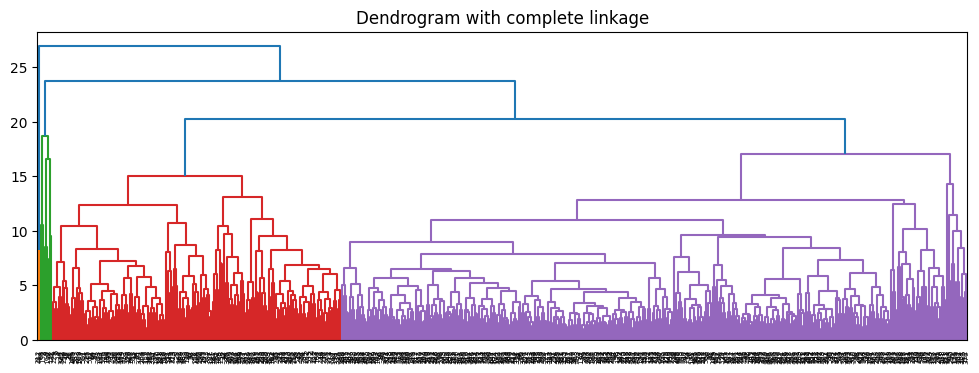

In [ ]:
# hierarchical clustering with different linkages
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

linkages = ['ward', 'single', 'complete']
for lk in linkages:
    Z = linkage(X_scaled, method=lk)
    plt.figure(figsize=(12, 4))
    dendrogram(Z)
    plt.xticks(rotation=90)
    plt.title(f'Dendrogram with {lk} linkage')
    plt.show()



# 5.3 Confusion Matrix

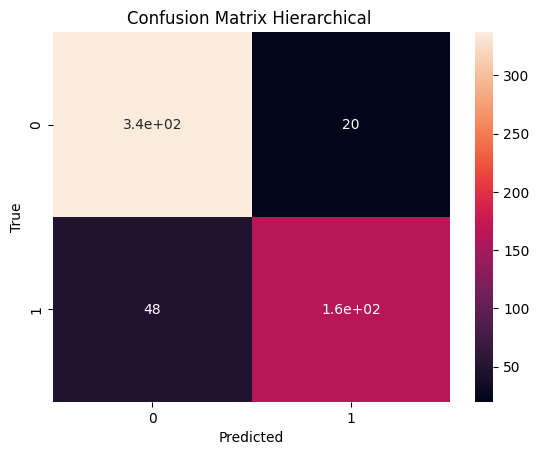

In [114]:
# confusion matrix for hierarchical clustering with ward linkagae 

Z = linkage(X_scaled, method='ward')
from scipy.cluster.hierarchy import fcluster
y_hc = fcluster(Z, t=2, criterion='maxclust')
y_hc = y_hc - 1
confusion = confusion_matrix(y_km, y_hc)
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Hierarchical ')
plt.show()

# 6 Combining Dimension Reduction with Clustering

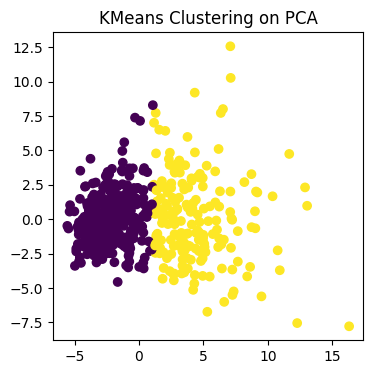

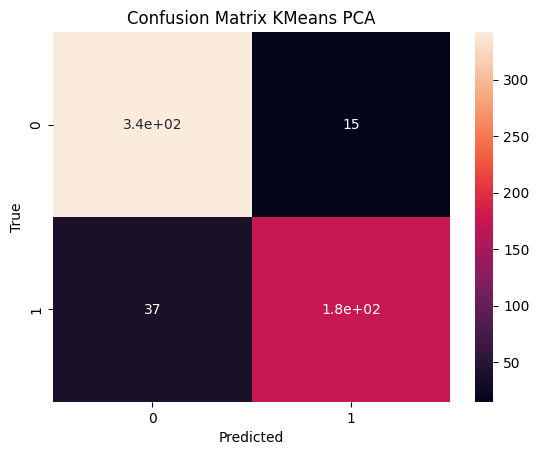

In [111]:
# run kmeans on the PCA transformation
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
kmeans_pca = KMeans(n_clusters=2)
kmeans_pca.fit(X_pca)
y_pred_pca_km = kmeans_pca.labels_
plt.figure(figsize=(4, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca_km)
plt.title('KMeans Clustering on PCA')
plt.show()

confusion_pca_km = confusion_matrix(y_km, y_pred_pca_km)
sns.heatmap(confusion_pca_km, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix KMeans PCA')
plt.show()


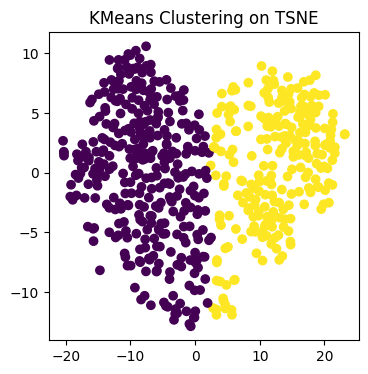

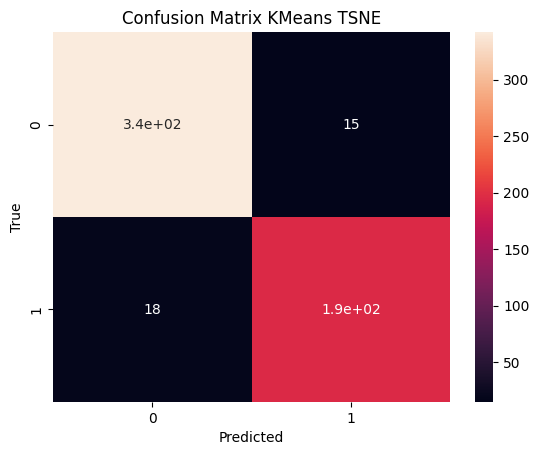

In [110]:
# run k means on tsne transformation
tsne = TSNE(perplexity=50)
X_tsne = tsne.fit_transform(X_scaled)
kmeans_tsne = KMeans(n_clusters=2)
kmeans_tsne.fit(X_tsne)
y_pred_tsne = kmeans_tsne.labels_
plt.figure(figsize=(4, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_tsne)
plt.title('KMeans Clustering on TSNE')
plt.show()
confusion_tsne_km = confusion_matrix(y_km, y_pred_tsne)
sns.heatmap(confusion_tsne, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix KMeans TSNE')
plt.show()

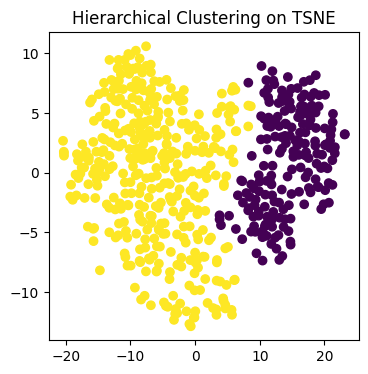

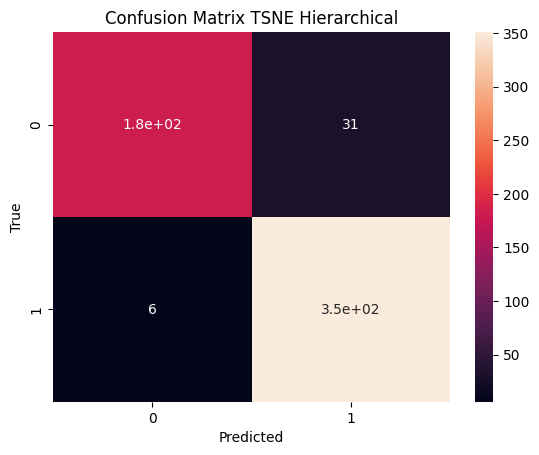

In [113]:
# now for TSNE and hierarchical clustering
Z = linkage(X_tsne, method='ward')
y_hc_tsne = fcluster(Z, t=2, criterion='maxclust')
y_hc_tsne = y_hc_tsne - 1
plt.figure(figsize=(4, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_hc_tsne)
plt.title('Hierarchical Clustering on TSNE')
plt.show()
confusion_tsne_hc = confusion_matrix(y_km2, y_hc_tsne)
sns.heatmap(confusion_tsne_hc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix TSNE Hierarchical')
plt.show()

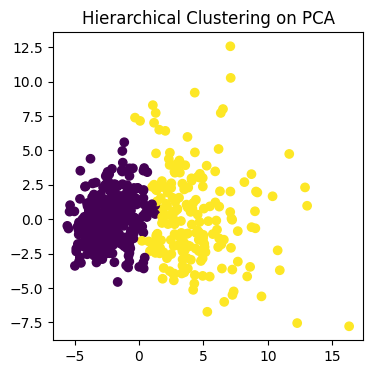

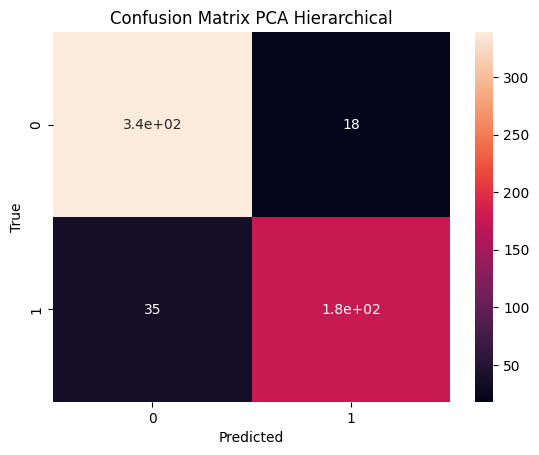

In [112]:
# now for PCA and hierarchical clustering
Z = linkage(X_pca, method='ward')
y_hc_pca = fcluster(Z, t=2, criterion='maxclust')
y_hc_pca = y_hc_pca - 1
plt.figure(figsize=(4, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hc_pca)
plt.title('Hierarchical Clustering on PCA')
plt.show()
confusion_pca_hc = confusion_matrix(y_km, y_hc_pca)
sns.heatmap(confusion_pca_hc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix PCA Hierarchical')
plt.show()

# 7. Evaluation

Broadly speaking, comparing confusion matrices, KMeans methods have better performance than hierarchical clustering. Specifically, the highest overall accuracy was KMeans with TSNE dimension reduction, followed by KMeans with no dimension reduction. TSNE also improved methods by a greater margin than PCA, although the resultant clusters are not necessarily interpretable (whereas they are meaningingful with PCA). Assuming these clusters would be used to assign cancer status, the most important ranking would be precision, in which case the strongest model would also be KMenas with TSNE. 


In [128]:
# compute dunn index for kmeans and hierarchical clustering
from sklearn.metrics import pairwise_distances
from itertools import combinations

def dunn_index(X, labels):

    dist = pairwise_distances(X, X)  
    unique_labels = np.unique(labels)
    
    max_intra = 0
    for lbl in unique_labels:
        in_cluster = np.where(labels == lbl)[0]
        if len(in_cluster) > 1:
            intra_distances = dist[np.ix_(in_cluster, in_cluster)]
            diameter = np.max(intra_distances)
            max_intra = max(max_intra, diameter)

    min_inter = float('inf')
    for c1, c2 in combinations(unique_labels, 2):
        c1_idx = np.where(labels == c1)[0]
        c2_idx = np.where(labels == c2)[0]
        inter_distances = dist[np.ix_(c1_idx, c2_idx)]
        cluster_min = np.min(inter_distances)
        min_inter = min(min_inter, cluster_min)

    return min_inter / max_intra


print(f'Dunn index for KMeans: {dunn_index(X_scaled, y_pred)}')
print(f'Dunn index for Hierarchical: {dunn_index(X_scaled, y_hc)}')
print(f'Dunn index for KMeans PCA: {dunn_index(X_scaled, y_pred_pca_km)}')
print(f'Dunn index for KMeans TSNE: {dunn_index(X_scaled, y_pred_tsne)}')
print(f'Dunn index for Hierarchical PCA: {dunn_index(X_scaled, y_hc_pca)}')
print(f'Dunn index for Hierarchical TSNE: {dunn_index(X_scaled, y_hc_tsne)}')
print()

# compute davies bouldin index for kmeans and hierarchical clustering
from sklearn.metrics import davies_bouldin_score
print(f'Davies Bouldin index for KMeans: {davies_bouldin_score(X_scaled, y_pred)}')
print(f'Davies Bouldin index for Hierarchical: {davies_bouldin_score(X_scaled, y_hc)}')
print(f'Davies Bouldin index for KMeans PCA: {davies_bouldin_score(X_scaled, y_pred_pca_km)}')
print(f'Davies Bouldin index for KMeans TSNE: {davies_bouldin_score(X_scaled, y_pred_tsne)}')
print(f'Davies Bouldin index for Hierarchical PCA: {davies_bouldin_score(X_scaled, y_hc_pca)}')
print(f'Davies Bouldin index for Hierarchical TSNE: {davies_bouldin_score(X_scaled, y_hc_tsne)}')



Dunn index for KMeans: 0.060762985655370444
Dunn index for Hierarchical: 0.07238792278196797
Dunn index for KMeans PCA: 0.060762985655370444
Dunn index for KMeans TSNE: 0.06492988513683219
Dunn index for Hierarchical PCA: 0.056993834435363676
Dunn index for Hierarchical TSNE: 0.08350424553050248

Davies Bouldin index for KMeans: 1.3092887340398867
Davies Bouldin index for Hierarchical: 1.3699635418941032
Davies Bouldin index for KMeans PCA: 1.315526889018145
Davies Bouldin index for KMeans TSNE: 1.4095136035525595
Davies Bouldin index for Hierarchical PCA: 1.3357340879639332
Davies Bouldin index for Hierarchical TSNE: 1.3240015651673764


Based on the Dunn/DB indices **(respectively, showing the ratio of the least within-cluster distance compared to the maximum across-cluster distance; vs. the average ratio of within-cluster distances to across-cluster sparation from the nearest cluster)** , the cleanest separation is found in the TSNE/Hierarchical clustering model, while the tightest clustering is found in KMeans with no dimension reduction. KMeans naturally leads to tighter clusters (lower DB) as it operates through minimization of intra-cluster variance, and holds assumptions of roughly equally sized clusters. Hierarchical clustering performs better with nonlinear decision boundaries and significant overlap in higher hierarchical order (here, this is likely an issue as we used two clusters). TSNE space provides neat visual separation, so utilizing this projection will likely improve Dunn indices, but inter-cluster distances are not exactly interpretable, so the DB scores for TSNE models are likely to be either meaningless or at least distorted. 

# 8. Conclusions
The PCA scree plot indicates that a fair amount, but potentially an insufficient amount, of variance was captured by the first two principal components. The biplot shows the PCA separates the two phenotypes relatively well, but that there are a fair number of missed cases (e.g. red dots in the blue area). Examining the loadings is not particularly informative to me as I am not very familiar with radiology or oncology, but some features (e.g. radius_mean) and perimeter_worse do intuitively make sense as being significantly explicative of variance. TSNE perplexities are not majorly different, and separation is similarly imperfect. Selecting optimal cluster numbers for KMeans was more straightforward with the silhouette score than elbow method as there was no clear elbow. Knowledge of the data structure was also helpful (e.g. knowing there were two real classes). Single linkage was grossly unhelpful when trying to cluster with hierarchical clustering; the Ward method was visually the most intuitive especially with the outermost dendrogram arm. Clustering based on the dimension reductions resulted in performance improvements (e.g. better confusion matrices) but in the case of KMeans actually worsened cluster compactness/separation.  For a clinical context, based on the confusion matrices, KMeans would be the clustering methodology of choice, likely by itself with no dimension reduction.


# 9. Additional questions
### a. Four PCs explain 79.4 % variance so 5 PCs to explain >=80% (see printout prior to skree)
### b. False; TSNE space distorts global distances across clusters. 
### c. The variables in this set span many metrics/orders of metrics, distributions, and modes (e.g. counts or differnet scales of measurements. Given that clustering fundamentally operates on distance metrics, it's important to ensure an "apples to apples" distance calculation to avoid being dominated by one variable. 
### d. A-Dunn index